In [8]:
# Import the random module.
import random

In [9]:
random.random()

0.4813643576587464

In [10]:
random.randint (-90, 90)

46

In [11]:
random.random() 

0.7104276332865156

In [12]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 90) + random.random()
    latitudes.append(random_lat)
    x += 1

In [13]:
latitudes

[1.134874150710056,
 -70.55498676811733,
 87.48071895722869,
 -63.44972688635838,
 22.374503805342954,
 -8.256822867166699,
 -20.74302231504475,
 1.139349889510893,
 -83.54303297384912,
 -60.89579032186462]

In [14]:
random.randrange(-90, 90, step=1)

-73

In [15]:
random.randrange(-90, 90, step=3)

-48

In [16]:
random.uniform(-90, 90)

-61.87441410019882

In [17]:
random.uniform(-9, 9)

-6.2866295716056335

In [18]:
# Import the NumPy module.
import numpy as np

In [19]:
np.random.uniform(-90.000, 90.000)

-42.12230595571649

In [20]:
np.random.uniform(-90.000, 90.000, size=1500)

array([-73.30585748,   9.82009684, -34.14899622, ...,  32.4395544 ,
       -31.00373313,  58.88432625])

In [21]:
# Import timeit.
import timeit

In [22]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

20.2 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500. 
%timeit latitudes(1500)

2.42 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
def latitudes(size):
    latitudes = []
    for x in range(size) :
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
    return latitudes
# Call the function with 1500. 
%timeit latitudes(1500)

2.36 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [30]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a64c796d97ed68b62f3c37ff8fa4295d


In [32]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------


In [34]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | moerai
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | itarema
Processing Record 4 of Set 13 | nanortalik
Processing Record 5 of Set 13 | chuy
Processing Record 6 of Set 13 | barrow
Processing Record 7 of Set 13 | guerrero
Processing Record 8 of Set 13 | kapaa
Processing Record 9 of Set 13 | hithadhoo
Processing Record 10 of Set 13 | valley city
Processing Record 11 of Set 13 | beyneu
Processing Record 12 of Set 13 | bambous virieux
Processing Record 13 of Set 13 | amderma
City not found. Skipping...
Processing Record 14 of Set 13 | hasaki
Processing Record 15 of Set 13 | goderich
Processing Record 16 of Set 13 | airai
Processing Record 17 of Set 13 | srednekolymsk
Processing Record 18 of Set 13 | bluff
Processing Record 19 of Set 13 | coahuayana
Processing Record 20 of Set 13 | bethel
Processing Record 21 of Set 13 | guarapari
Processing Record 22 of Set 13 | samusu
City not found. Skipping...
Processing Record 23 of Set 13 | por

Processing Record 33 of Set 16 | khatanga
Processing Record 34 of Set 16 | castanos
Processing Record 35 of Set 16 | matadi
Processing Record 36 of Set 16 | oudtshoorn
Processing Record 37 of Set 16 | vardo
Processing Record 38 of Set 16 | zhigansk
Processing Record 39 of Set 16 | kisangani
Processing Record 40 of Set 16 | seymchan
Processing Record 41 of Set 16 | les cayes
Processing Record 42 of Set 16 | chardara
Processing Record 43 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 16 | asayita
City not found. Skipping...
Processing Record 45 of Set 16 | voh
Processing Record 46 of Set 16 | pevek
Processing Record 47 of Set 16 | villanueva
Processing Record 48 of Set 16 | berestechko
Processing Record 49 of Set 16 | cayenne
Processing Record 50 of Set 16 | yumbel
Processing Record 1 of Set 17 | asau
Processing Record 2 of Set 17 | vuktyl
Processing Record 3 of Set 17 | tateyama
Processing Record 4 of Set 17 | vaitape
Processing Record 5 of Set 17 | hegra
P

Processing Record 19 of Set 20 | imisli
City not found. Skipping...
Processing Record 20 of Set 20 | ust-tsilma
Processing Record 21 of Set 20 | phan rang
City not found. Skipping...
Processing Record 22 of Set 20 | itapirapua
Processing Record 23 of Set 20 | general roca
Processing Record 24 of Set 20 | chifeng
Processing Record 25 of Set 20 | kenai
Processing Record 26 of Set 20 | ponta do sol
Processing Record 27 of Set 20 | a coruna
Processing Record 28 of Set 20 | seminole
Processing Record 29 of Set 20 | avarua
Processing Record 30 of Set 20 | sheridan
Processing Record 31 of Set 20 | husavik
Processing Record 32 of Set 20 | grand gaube
Processing Record 33 of Set 20 | gat
Processing Record 34 of Set 20 | raudeberg
Processing Record 35 of Set 20 | palmer
Processing Record 36 of Set 20 | waiouru
Processing Record 37 of Set 20 | sambava
Processing Record 38 of Set 20 | calama
Processing Record 39 of Set 20 | emporia
Processing Record 40 of Set 20 | paka
Processing Record 41 of Set 

Processing Record 4 of Set 24 | freeport
Processing Record 5 of Set 24 | henties bay
Processing Record 6 of Set 24 | babanusah
City not found. Skipping...
Processing Record 7 of Set 24 | sinnamary
Processing Record 8 of Set 24 | jumla
Processing Record 9 of Set 24 | antalaha
Processing Record 10 of Set 24 | invermere
Processing Record 11 of Set 24 | changji
Processing Record 12 of Set 24 | catamarca
Processing Record 13 of Set 24 | shubarshi
Processing Record 14 of Set 24 | pasni
Processing Record 15 of Set 24 | kuching
Processing Record 16 of Set 24 | axim
Processing Record 17 of Set 24 | the valley
Processing Record 18 of Set 24 | mandera
Processing Record 19 of Set 24 | fevralsk
City not found. Skipping...
Processing Record 20 of Set 24 | giyani
Processing Record 21 of Set 24 | isangel
Processing Record 22 of Set 24 | flinders
Processing Record 23 of Set 24 | sharjah
Processing Record 24 of Set 24 | katobu
Processing Record 25 of Set 24 | pacific grove
Processing Record 26 of Set 24

In [37]:
len(city_data)

562

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moerai,-22.43,-151.33,81.36,83,100,11.79,PF,2020-02-20 07:18:41
1,Mataura,-46.19,168.86,70.00,77,93,4.00,NZ,2020-02-20 07:18:41
2,Itarema,-2.92,-39.92,74.44,93,100,3.67,BR,2020-02-20 07:18:42
3,Nanortalik,60.14,-45.24,19.04,51,100,7.74,GL,2020-02-20 07:18:42
4,Chuy,-33.70,-53.46,67.28,92,0,5.32,UY,2020-02-20 07:18:42
5,Barrow,71.29,-156.79,-2.20,77,90,9.17,US,2020-02-20 07:16:47
6,Guerrero,17.67,-100.00,57.45,58,0,2.08,MX,2020-02-20 07:18:42
7,Kapaa,22.08,-159.32,75.20,73,90,23.04,US,2020-02-20 07:17:15
8,Hithadhoo,-0.60,73.08,82.92,78,28,16.15,MV,2020-02-20 07:18:43
9,Valley City,46.92,-98.00,-5.80,83,1,4.70,US,2020-02-20 07:18:43


In [40]:
new_col_ord = ["City", "Country","Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_ord]

In [41]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moerai,PF,2020-02-20 07:18:41,-22.43,-151.33,81.36,83,100,11.79
1,Mataura,NZ,2020-02-20 07:18:41,-46.19,168.86,70.00,77,93,4.00
2,Itarema,BR,2020-02-20 07:18:42,-2.92,-39.92,74.44,93,100,3.67
3,Nanortalik,GL,2020-02-20 07:18:42,60.14,-45.24,19.04,51,100,7.74
4,Chuy,UY,2020-02-20 07:18:42,-33.70,-53.46,67.28,92,0,5.32
5,Barrow,US,2020-02-20 07:16:47,71.29,-156.79,-2.20,77,90,9.17
6,Guerrero,MX,2020-02-20 07:18:42,17.67,-100.00,57.45,58,0,2.08
7,Kapaa,US,2020-02-20 07:17:15,22.08,-159.32,75.20,73,90,23.04
8,Hithadhoo,MV,2020-02-20 07:18:43,-0.60,73.08,82.92,78,28,16.15
9,Valley City,US,2020-02-20 07:18:43,46.92,-98.00,-5.80,83,1,4.70


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

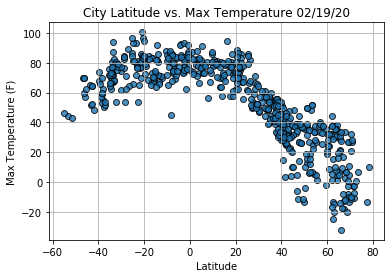

In [50]:
# Import the time module.
import time
# IMporting Matplotlib
import matplotlib.pyplot as plt
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

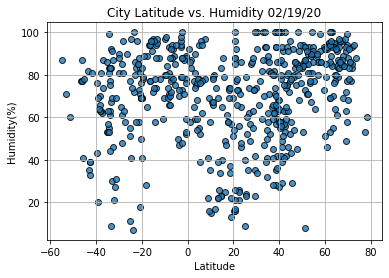

In [51]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

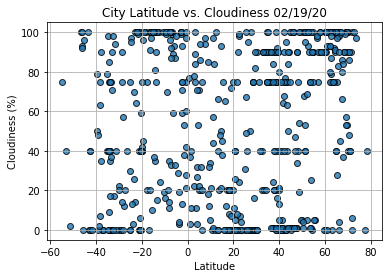

In [52]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

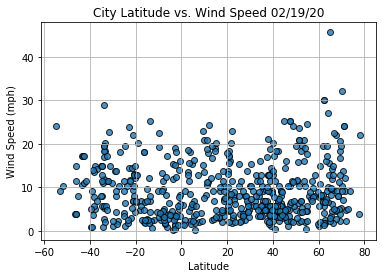

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()